# Exploratory Data Analysis (EDA) Guide

EDA is the process of summarizing, visualizing, and understanding your dataset. It helps you uncover patterns, spot anomalies, check assumptions, and decide on next steps.

1. Understand Your Dataset

Start by loading your data (e.g., in pandas):

In [4]:
import pandas as pd
import seaborn as sns

dataset = sns.load_dataset("titanic")
df = pd.DataFrame(dataset)
df.drop_duplicates(inplace=True)

Look at structure

In [19]:
df.shape        # rows and columns
df.info()       # data types, nulls
df.head()       # first 5 rows

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    object  
 3   age          678 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     782 non-null    object  
 8   class        784 non-null    category
 9   who          784 non-null    object  
 10  adult_male   784 non-null    bool    
 11  deck         202 non-null    category
 12  embark_town  782 non-null    object  
 13  alive        784 non-null    object  
 14  alone        784 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 77.0+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Summary statistics

In [6]:
df.describe()   # mean, std, min, max, quartiles

,survived,pclass,age,sibsp,parch,fare
count,784.000000,784.000000,678.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.869351,0.522959,0.415816,34.711740
std,0.492507,0.855056,14.759076,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.250000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Check for Missing & Duplicate Data

Missing or duplicate values can bias analysis.

In [7]:
df.isnull().sum()       # count null values per column
df.duplicated().sum()   # check duplicates  

np.int64(0)

3. Univariate Analysis (Single Variable)

Look at each variable individually.

- Numeric variables

Histograms, boxplots to check distribution, skewness, outliers.

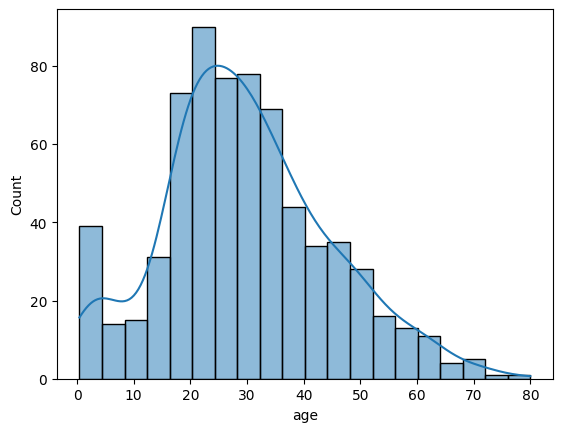

<Axes: xlabel='fare'>

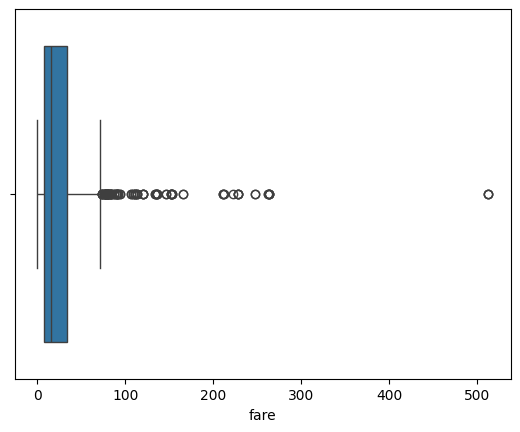

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['age'], bins=20, kde=True)
plt.show()
sns.boxplot(x=df['fare'])

- Categorical variables

Count plots to see frequencies.

<Axes: xlabel='pclass', ylabel='count'>

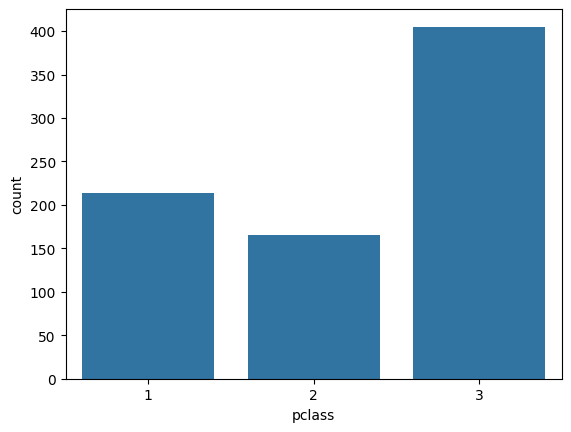

In [10]:
sns.countplot(x='pclass', data=df)

3. Bivariate Analysis (Relationships between two variables)

Helps check correlations and associations.

- Numeric vs. Numeric: scatter plots, correlation matrix.

<Axes: >

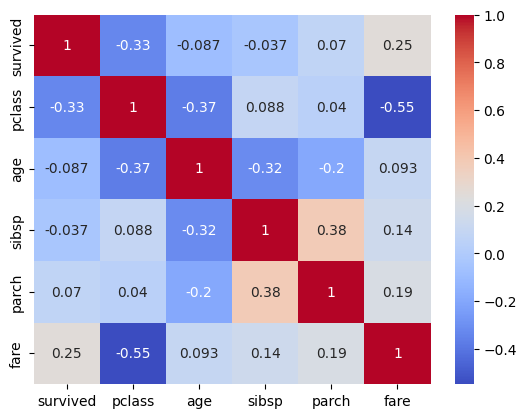

In [13]:
sns.scatterplot(x='age', y='fare', data=df)
new_df = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].copy()
sns.heatmap(new_df.corr(), annot=True, cmap="coolwarm")

- Categorical vs. Numeric: boxplots, violin plots

<Axes: xlabel='survived', ylabel='age'>

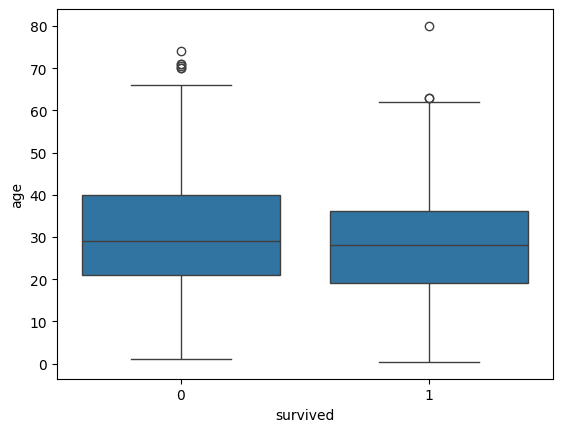

In [14]:
sns.boxplot(x="survived", y="age", data=df)

- Categorical vs. Categorical: cross-tabulations, stacked bar charts

<Axes: xlabel='pclass', ylabel='count'>

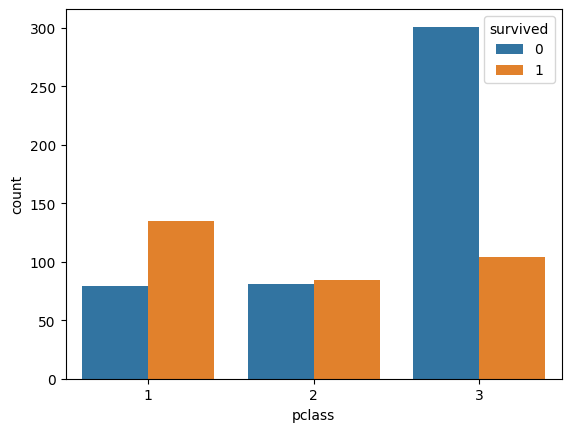

In [15]:
pd.crosstab(df['pclass'], df['survived'])
sns.countplot(x='pclass', hue='survived', data=df)

5. Multivariate Analysis

Look at 3+ variables together to uncover deeper patterns.

Examples:
- Pair plots:

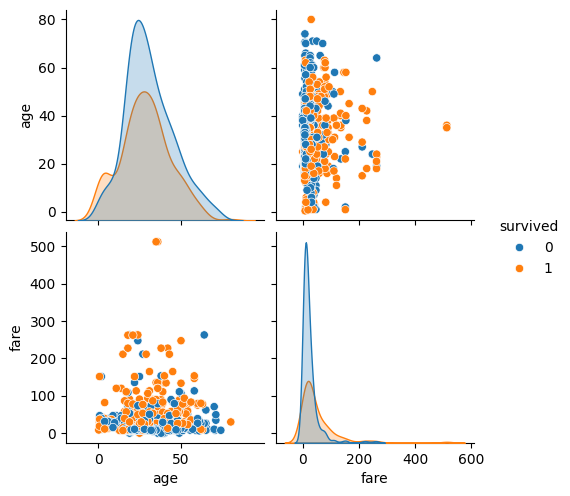

In [16]:
sns.pairplot(df[['age', 'fare', 'survived']], hue='survived')

- Group by + aggregation:

In [17]:
df.groupby('pclass')['fare'].mean()

pclass
1    84.487812
2    21.835404
3    13.656223
Name: fare, dtype: float64

6. Correlation & Feature Relationships

- Check correlation matrix
- Spot multicollinearity (when two features are highly correlated)
- Use feature importance (with models like Random Forests)

7. Outliers

Identify extreme values that may affect results.

Decide whether to cap, transform, or remove them.

<Axes: xlabel='fare'>

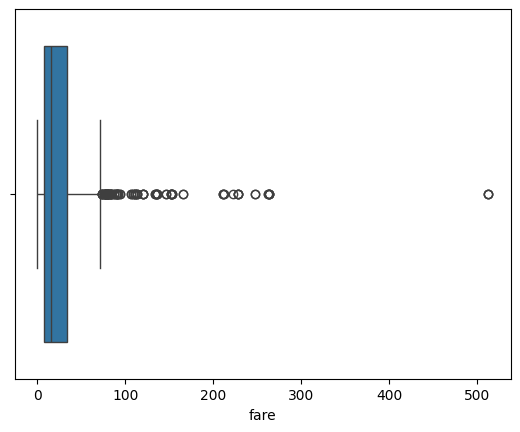

In [18]:
sns.boxplot(x=df['fare'])

8. Data Cleaning / Transformation

Before modeling:
- Handle missing values
- Encode categorical variables
- Scale/normalize numeric features if needed

# The EDA Mindset

Ask questions like:

- What does the distribution look like?
- Are there unusual values?
- Which features correlate with the target?
- Do we see class imbalance (e.g., far more survivors than non-survivors)?

Use visuals to tell the story, not just numbers